In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from datetime import datetime

##### **Crear datos aleatorios**

In [2]:
vendedor_nombre = ['Said','Jared', 'Misra', 'Simba','Sam']
cantidad = np.arange(200,500)

dia = np.arange(1,30)
mes = np.arange(1,13)
anio = 2024

canal_venta = ['Tienda Física', 'Línea']
estado = ['Completado', 'Pendiente', 'Cancelado']

lista_numeros = [random.choice(cantidad) for _ in range(0,200)]
lista_nombres = [random.choice(vendedor_nombre) for _ in range(0,200)]
lista_canal_venta = [random.choice(canal_venta) for _ in range(0,200)]
lista_estado = [random.choice(estado) for _ in range(0,200)]
lista_fecha = []


for i in range(0,200):
    dia_aleatorio = random.choice(dia)
    mes_aleatorio = random.choice(mes)
    fecha = datetime(anio, mes_aleatorio, dia_aleatorio).date()
    lista_fecha.append(fecha)

data = {
    'Vendedor': lista_nombres,
    'Cantidad': lista_numeros,
    'estado': lista_estado,
    'canal_venta': lista_canal_venta, 
    'fecha': lista_fecha
}

df = pd.DataFrame(data)
df

,Vendedor,Cantidad,estado,canal_venta,fecha
0,Simba,318,Completado,Línea,2024-12-27
1,Misra,340,Cancelado,Línea,2024-03-27
2,Sam,437,Pendiente,Tienda Física,2024-11-28
3,Misra,269,Pendiente,Tienda Física,2024-01-28
4,Misra,315,Completado,Tienda Física,2024-01-23
...,...,...,...,...,...
195,Misra,484,Completado,Línea,2024-01-18
196,Misra,473,Pendiente,Línea,2024-09-16
197,Simba,255,Cancelado,Línea,2024-07-25
198,Jared,483,Cancelado,Tienda Física,2024-09-02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendedor     200 non-null    object
 1   Cantidad     200 non-null    int64 
 2   estado       200 non-null    object
 3   canal_venta  200 non-null    object
 4   fecha        200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [4]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Vendedor     200 non-null    object        
 1   Cantidad     200 non-null    int64         
 2   estado       200 non-null    object        
 3   canal_venta  200 non-null    object        
 4   fecha        200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.9+ KB


### 🟢 Nivel Básico (Exploración y estadísticas)

***1.-¿Cuál es la cantidad total vendida en todos el año?***

In [5]:
venta_2024 = df[df['fecha'].dt.year == 2024]
cantidad_total_2024 = venta_2024['Cantidad'].sum()
print(f'Cantidad Vendidad en el año 2024: ${cantidad_total_2024}')

Cantidad Vendidad en el año 2024: $71091


***2.-¿Qué vendedor tiene más ventas acumuladas?***

In [6]:
vendedor_mas_ventas = df.groupby('Vendedor')['Cantidad'].sum()
vendedor_mas_ventas.sort_values(ascending=False).head(1)

Vendedor
Said    17722
Name: Cantidad, dtype: int64

***3.-¿Cuántas ventas hay por estado (Pendiente, Completado, Cancelado)?***

In [7]:
ventas_estado = df['estado'].value_counts()
ventas_estado

estado
Completado    77
Cancelado     66
Pendiente     57
Name: count, dtype: int64

***4.-¿Cuál es la cantidad promedio por venta?***

In [8]:
promedio_venta = df['Cantidad'].mean()
print(f'Cantidad promedio por venta: ${promedio_venta:.2f}')

Cantidad promedio por venta: $355.45


***5.-¿Qué canal de venta tuvo más ventas?***

In [9]:
canal_venta = df['canal_venta'].value_counts()
canal_venta.sort_values(ascending=False).head(1)

canal_venta
Tienda Física    105
Name: count, dtype: int64

In [10]:
# Crear un columna mes
df['mes'] = df['fecha'].dt.month

# Crear una columna dia
df['dia'] = df['fecha'].dt.day

# Transformamos los numeros a meses
meses_nombre = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}


df['mes_nombre'] = df['mes'].replace(meses_nombre)
df


,Vendedor,Cantidad,estado,canal_venta,fecha,mes,dia,mes_nombre
0,Simba,318,Completado,Línea,2024-12-27,12,27,Diciembre
1,Misra,340,Cancelado,Línea,2024-03-27,3,27,Marzo
2,Sam,437,Pendiente,Tienda Física,2024-11-28,11,28,Noviembre
3,Misra,269,Pendiente,Tienda Física,2024-01-28,1,28,Enero
4,Misra,315,Completado,Tienda Física,2024-01-23,1,23,Enero
...,...,...,...,...,...,...,...,...
195,Misra,484,Completado,Línea,2024-01-18,1,18,Enero
196,Misra,473,Pendiente,Línea,2024-09-16,9,16,Septiembre
197,Simba,255,Cancelado,Línea,2024-07-25,7,25,Julio
198,Jared,483,Cancelado,Tienda Física,2024-09-02,9,2,Septiembre


### 🟡 Nivel Intermedio (Agrupamientos y fechas)

***6.-Ventas por mes: ¿Cuántas ventas hubo en cada mes?***

In [11]:
ventas_por_mes = df['mes_nombre'].value_counts()
ventas_por_mes.sort_values(ascending=False).head(1)

mes_nombre
Enero    23
Name: count, dtype: int64

***7.-Cantidad total vendida por canal y estado (tabla cruzada)?***

In [12]:
cantidad_total_canal_estado = df.groupby(['canal_venta','estado'])['Cantidad'].sum()
cantidad_total_canal_estado

canal_venta    estado    
Línea          Cancelado     10906
               Completado    14003
               Pendiente     10387
Tienda Física  Cancelado     11384
               Completado    13955
               Pendiente     10456
Name: Cantidad, dtype: int64

In [13]:
tabla_cruzada_ventas = pd.pivot_table(df,
                                      values='Cantidad',
                                      index='canal_venta',
                                      columns='estado',
                                      aggfunc='sum',
                                      fill_value=0) # Rellena los valores NaN con 0
print("\nTabla cruzada de cantidad total vendida por canal y estado (usando pivot_table):")
print(tabla_cruzada_ventas)


Tabla cruzada de cantidad total vendida por canal y estado (usando pivot_table):
estado         Cancelado  Completado  Pendiente
canal_venta                                    
Línea              10906       14003      10387
Tienda Física      11384       13955      10456


***8.-Ranking de vendedores por cantidad total vendida.***

In [14]:
vendedor_ranking = df.groupby('Vendedor')['Cantidad'].sum()
vendedor_ranking.sort_values(ascending=False)

Vendedor
Said     17722
Misra    16706
Simba    14865
Jared    12019
Sam       9779
Name: Cantidad, dtype: int64

***9.-Filtra las ventas del segundo trimestre (abril-junio).***

In [15]:
meses_filtro = ['Abril','Mayo','Junio']
ventas_abril_a_julio = df[df['mes_nombre'].isin(meses_filtro)]
ventas_abril_a_julio

,Vendedor,Cantidad,estado,canal_venta,fecha,mes,dia,mes_nombre
8,Simba,327,Pendiente,Tienda Física,2024-04-09,4,9,Abril
9,Jared,381,Completado,Tienda Física,2024-06-25,6,25,Junio
12,Said,306,Pendiente,Tienda Física,2024-04-19,4,19,Abril
16,Jared,297,Pendiente,Tienda Física,2024-04-18,4,18,Abril
17,Sam,338,Completado,Línea,2024-05-14,5,14,Mayo
20,Simba,321,Completado,Línea,2024-05-26,5,26,Mayo
21,Said,299,Completado,Tienda Física,2024-06-17,6,17,Junio
25,Said,385,Completado,Línea,2024-05-05,5,5,Mayo
26,Misra,422,Completado,Línea,2024-05-16,5,16,Mayo
27,Sam,277,Completado,Línea,2024-05-08,5,8,Mayo


***10.-¿Qué día tuvo la mayor cantidad de ventas realizadas?***

In [16]:
dia_mas_ventas = df.groupby(['dia'])['Cantidad'].sum()
dia_mas_ventas.sort_values(ascending=False).head(1)

dia
16    4434
Name: Cantidad, dtype: int64

### 🔵 Nivel Avanzado (Transformación y lógica de negocio)

***11.-Crea una columna mes a partir de la fecha, y agrupa ventas por mes y canal.***

In [17]:
# La columna mes ya existe
ventas_mes_canal = df.groupby(['mes','mes_nombre','canal_venta'])['Cantidad'].sum()
ventas_mes_canal

mes  mes_nombre  canal_venta  
1    Enero       Línea            3965
                 Tienda Física    4027
2    Febrero     Línea            3092
                 Tienda Física    2669
3    Marzo       Línea            3817
                 Tienda Física    3719
4    Abril       Línea            2662
                 Tienda Física    3802
5    Mayo        Línea            3614
                 Tienda Física    3466
6    Junio       Línea             842
                 Tienda Física    2752
7    Julio       Línea            3571
                 Tienda Física    3356
8    Agosto      Línea            1774
                 Tienda Física    2264
9    Septiembre  Línea            3012
                 Tienda Física    1654
10   Octubre     Línea            2453
                 Tienda Física    2711
11   Noviembre   Línea            2918
                 Tienda Física    2625
12   Diciembre   Línea            3576
                 Tienda Física    2750
Name: Cantidad, dtype: int64

***12.-Agrega una columna objetivo_logrado si la cantidad es mayor a 400.***

In [18]:
df['objetivo_logrado'] = np.where(df['Cantidad'] > 400, 'Logrado', 'No logrado')
df

,Vendedor,Cantidad,estado,canal_venta,fecha,mes,dia,mes_nombre,objetivo_logrado
0,Simba,318,Completado,Línea,2024-12-27,12,27,Diciembre,No logrado
1,Misra,340,Cancelado,Línea,2024-03-27,3,27,Marzo,No logrado
2,Sam,437,Pendiente,Tienda Física,2024-11-28,11,28,Noviembre,Logrado
3,Misra,269,Pendiente,Tienda Física,2024-01-28,1,28,Enero,No logrado
4,Misra,315,Completado,Tienda Física,2024-01-23,1,23,Enero,No logrado
...,...,...,...,...,...,...,...,...,...
195,Misra,484,Completado,Línea,2024-01-18,1,18,Enero,Logrado
196,Misra,473,Pendiente,Línea,2024-09-16,9,16,Septiembre,Logrado
197,Simba,255,Cancelado,Línea,2024-07-25,7,25,Julio,No logrado
198,Jared,483,Cancelado,Tienda Física,2024-09-02,9,2,Septiembre,Logrado


***13.-Calcula el porcentaje de ventas canceladas por cada vendedor.***

In [23]:
# 1. Calcular el total de ventas canceladas por cada vendedor
ventas_canceladas_por_vendedor = df[df['estado'] == 'Cancelado'].groupby('Vendedor')['Cantidad'].sum()

# 2. Calcular el total de ventas (todas) por cada vendedor
ventas_totales_por_vendedor = df.groupby('Vendedor')['Cantidad'].sum()

# 3. Calcular el porcentaje de ventas canceladas por cada vendedor
porcentaje_canceladas_por_vendedor = (ventas_canceladas_por_vendedor.reindex(ventas_totales_por_vendedor.index, fill_value=0) / ventas_totales_por_vendedor) * 100

# Mostrar el resultado
print("Total de Ventas Canceladas por Vendedor:")
print(f'{ventas_canceladas_por_vendedor}')

print("\nPorcentaje de Ventas Canceladas por Vendedor:")
print(porcentaje_canceladas_por_vendedor.round(2).astype(str) + '%')

Total de Ventas Canceladas por Vendedor:
Vendedor
Jared    4418
Misra    3813
Said     5546
Sam      2694
Simba    5819
Name: Cantidad, dtype: int64

Porcentaje de Ventas Canceladas por Vendedor:
Vendedor
Jared    36.76%
Misra    22.82%
Said     31.29%
Sam      27.55%
Simba    39.15%
Name: Cantidad, dtype: object


***14.-Simula precios por unidad aleatorios y calcula una columna monto_total = cantidad × precio_unitario.***

In [24]:
# No existe una columna "cantidaa" por lo que ocupare la de dia para simular cantidad
df['monto_total'] = df['Cantidad'] * df['dia']
df

,Vendedor,Cantidad,estado,canal_venta,fecha,mes,dia,mes_nombre,objetivo_logrado,monto_total
0,Simba,318,Completado,Línea,2024-12-27,12,27,Diciembre,No logrado,8586
1,Misra,340,Cancelado,Línea,2024-03-27,3,27,Marzo,No logrado,9180
2,Sam,437,Pendiente,Tienda Física,2024-11-28,11,28,Noviembre,Logrado,12236
3,Misra,269,Pendiente,Tienda Física,2024-01-28,1,28,Enero,No logrado,7532
4,Misra,315,Completado,Tienda Física,2024-01-23,1,23,Enero,No logrado,7245
...,...,...,...,...,...,...,...,...,...,...
195,Misra,484,Completado,Línea,2024-01-18,1,18,Enero,Logrado,8712
196,Misra,473,Pendiente,Línea,2024-09-16,9,16,Septiembre,Logrado,7568
197,Simba,255,Cancelado,Línea,2024-07-25,7,25,Julio,No logrado,6375
198,Jared,483,Cancelado,Tienda Física,2024-09-02,9,2,Septiembre,Logrado,966


***15.-Agrega una columna con la categoría de venta:***

* Alta si la cantidad > 450
* Media si está entre 350–450
* Baja si < 350


In [25]:
# Definir las condiciones
condiciones = [
    df['Cantidad'] > 450,                             
    (df['Cantidad'] >= 350) & (df['Cantidad'] <= 450)
]

# Definir las opciones correspondientes a cada condición
opciones = ['Alta', 'Media']

# Crear la columna 'venta' usando np.select()
# El valor 'Baja' será el default si ninguna de las condiciones anteriores se cumple
df['venta'] = np.select(condiciones, opciones, default='Baja')

df

,Vendedor,Cantidad,estado,canal_venta,fecha,mes,dia,mes_nombre,objetivo_logrado,monto_total,venta
0,Simba,318,Completado,Línea,2024-12-27,12,27,Diciembre,No logrado,8586,Baja
1,Misra,340,Cancelado,Línea,2024-03-27,3,27,Marzo,No logrado,9180,Baja
2,Sam,437,Pendiente,Tienda Física,2024-11-28,11,28,Noviembre,Logrado,12236,Media
3,Misra,269,Pendiente,Tienda Física,2024-01-28,1,28,Enero,No logrado,7532,Baja
4,Misra,315,Completado,Tienda Física,2024-01-23,1,23,Enero,No logrado,7245,Baja
...,...,...,...,...,...,...,...,...,...,...,...
195,Misra,484,Completado,Línea,2024-01-18,1,18,Enero,Logrado,8712,Alta
196,Misra,473,Pendiente,Línea,2024-09-16,9,16,Septiembre,Logrado,7568,Alta
197,Simba,255,Cancelado,Línea,2024-07-25,7,25,Julio,No logrado,6375,Baja
198,Jared,483,Cancelado,Tienda Física,2024-09-02,9,2,Septiembre,Logrado,966,Alta


### 🔴 Nivel Experto (Storytelling y visualización)

***16.-¿Cómo se comportan las ventas a lo largo del año? Grafica una serie temporal.***

C:\Users\52771\AppData\Local\Temp\ipykernel_22152\1457375646.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  largo_del_anio = df.groupby(['mes_nombre'])['Cantidad'].sum()


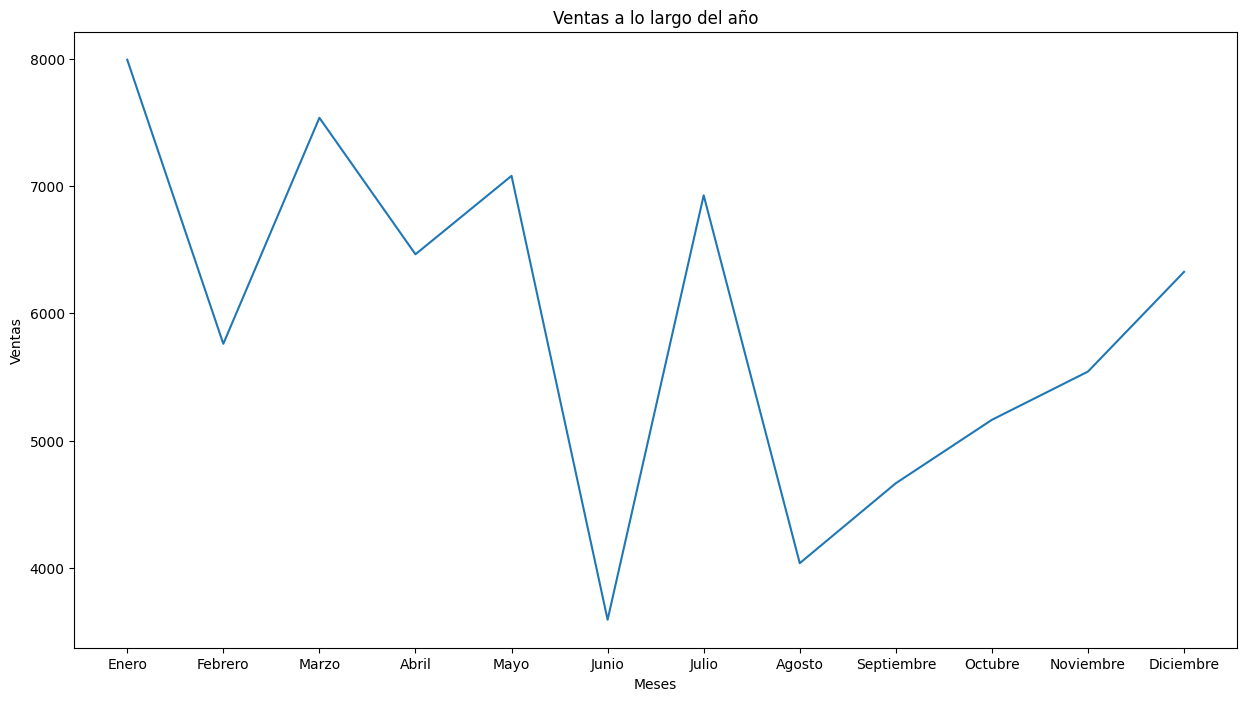

In [30]:
# Lista con los meses ordenados cronologicamente
orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Convertir la columna 'mes_nombre' a tipo categórico ordenado
df['mes_nombre'] = pd.Categorical(df['mes_nombre'], categories=orden_meses, ordered=True)

largo_del_anio = df.groupby(['mes_nombre'])['Cantidad'].sum()

plt.figure(figsize=(15,8))
plt.plot(largo_del_anio.index, largo_del_anio.values)
plt.title('Ventas a lo largo del año')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.show()

***17.-Haz un gráfico de barras con las ventas por estado y por canal.***

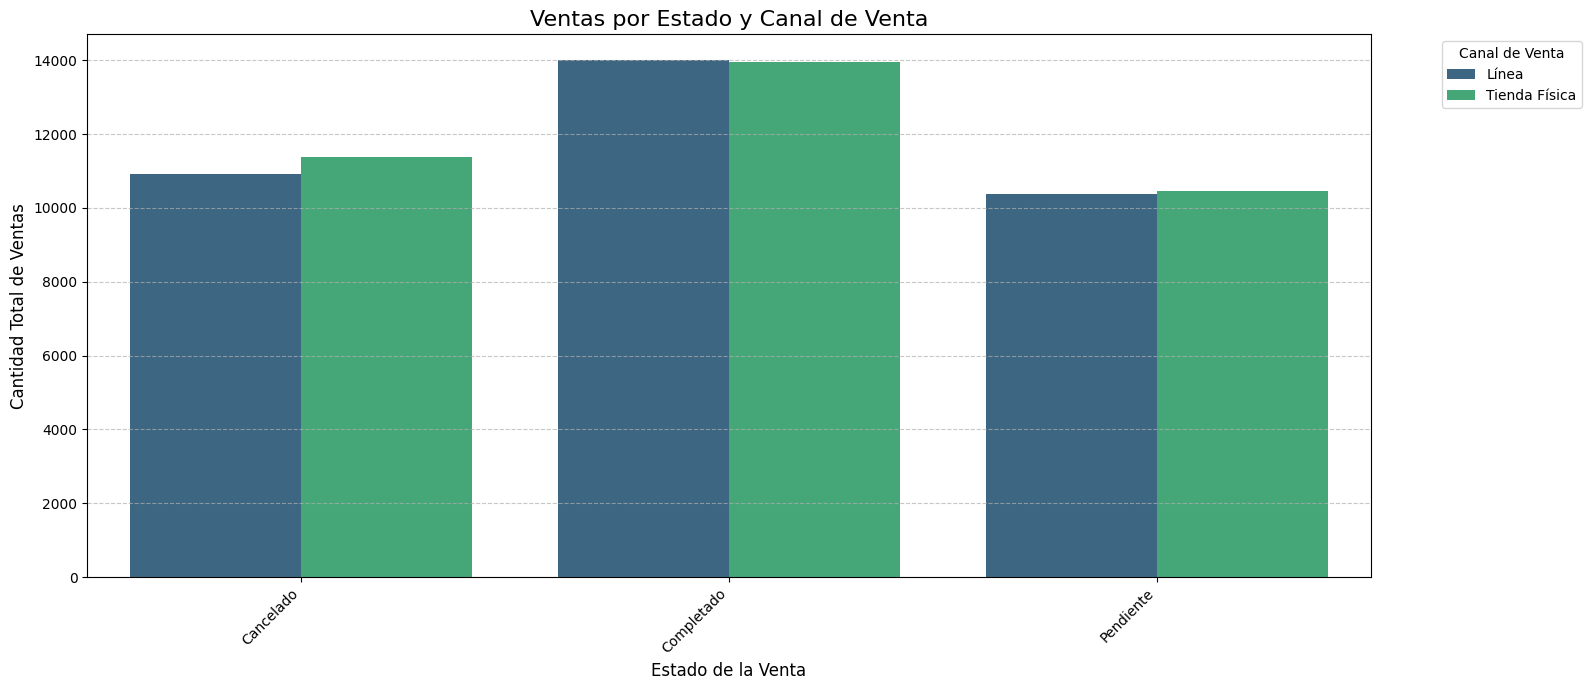

In [32]:
ventas_agrupadas = df.groupby(['estado','canal_venta'])['Cantidad'].sum().reset_index()

plt.figure(figsize=(16,7))
sns.barplot(
    data=ventas_agrupadas,
    x='estado',
    y='Cantidad',
    hue='canal_venta', # 'hue' crea barras agrupadas por 'canal_venta'
    palette='viridis' # Elige una paleta de colores
)

# Añadir títulos y etiquetas
plt.title('Ventas por Estado y Canal de Venta', fontsize=16)
plt.xlabel('Estado de la Venta', fontsize=12)
plt.ylabel('Cantidad Total de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X si son largas
plt.legend(title='Canal de Venta', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y

# Mostrar el gráfico
plt.show()

***18.-Comparativa de vendedores mes a mes: ¿quién tuvo más picos de rendimiento?***

C:\Users\52771\AppData\Local\Temp\ipykernel_22152\3637651707.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_mensuales_por_vendedor = df.groupby(['Vendedor', 'mes', 'mes_nombre'])['Cantidad'].sum().reset_index()


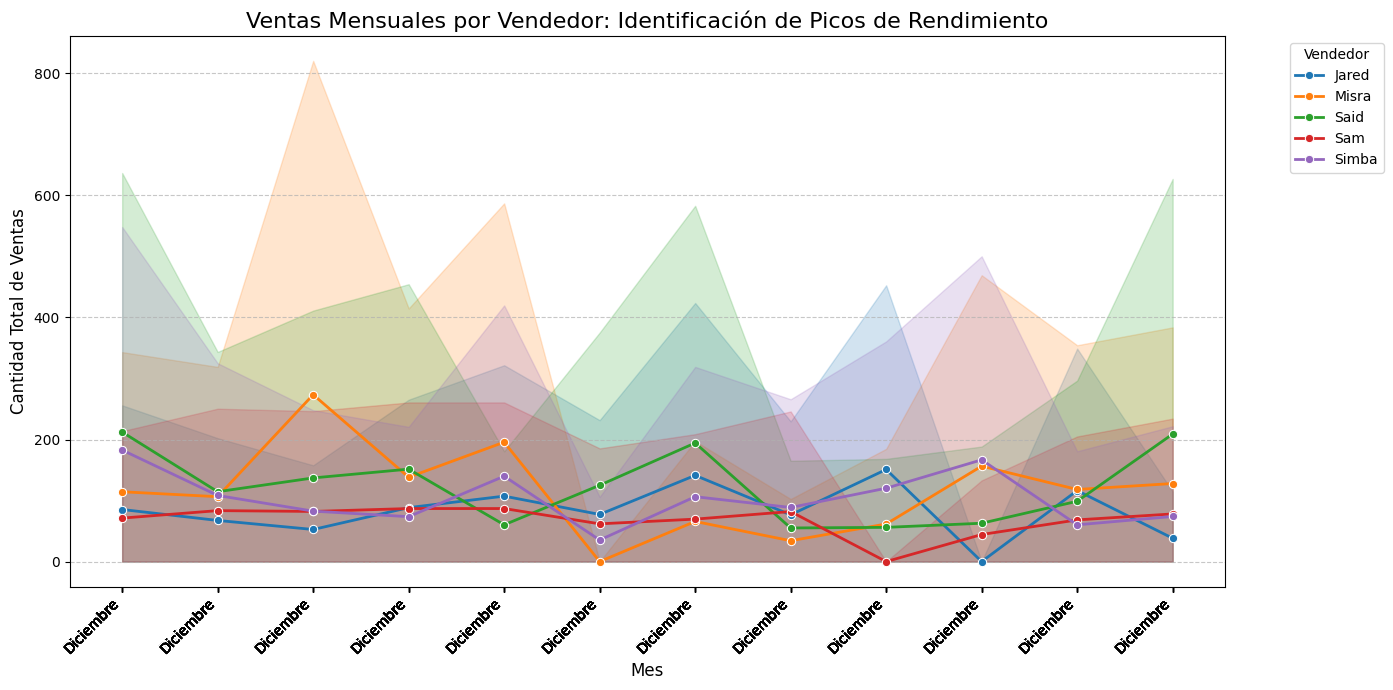

In [33]:
ventas_mensuales_por_vendedor = df.groupby(['Vendedor', 'mes', 'mes_nombre'])['Cantidad'].sum().reset_index()

ventas_mensuales_por_vendedor = ventas_mensuales_por_vendedor.sort_values(by=['Vendedor', 'mes'])

orden_meses = ventas_mensuales_por_vendedor[['mes', 'mes_nombre']].drop_duplicates().sort_values(by='mes')
etiquetas_meses = orden_meses['mes_nombre'].tolist()
ticks_meses = orden_meses['mes'].tolist()

plt.figure(figsize=(14, 7)) # Ajusta el tamaño de la figura para una mejor visualización

sns.lineplot(
    data=ventas_mensuales_por_vendedor,
    x='mes',           # Usa el mes numérico en el eje X para el orden correcto
    y='Cantidad',      # La cantidad de ventas en el eje Y
    hue='Vendedor',    # Crea una línea separada para cada vendedor
    marker='o',        # Añade un círculo en cada punto de datos
    linewidth=2,       # Grosor de la línea
    palette='tab10'    # Paleta de colores para las líneas
)

# Personalización del gráfico
plt.title('Ventas Mensuales por Vendedor: Identificación de Picos de Rendimiento', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad Total de Ventas', fontsize=12)
# Establece los 'ticks' del eje X con los números de mes, pero las 'labels' con los nombres de mes
plt.xticks(ticks=ticks_meses, labels=etiquetas_meses, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave en el eje Y
plt.legend(title='Vendedor', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan

# Mostrar el gráfico
plt.show()

***19.-¿Existe alguna estacionalidad o mes con más cancelaciones?***

In [43]:
mes_cancelaciones = df.groupby('mes_nombre')['estado'].count()
mes_cancelaciones.sort_values(ascending=False).head(1)

C:\Users\52771\AppData\Local\Temp\ipykernel_22152\2746183228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mes_cancelaciones = df.groupby('mes_nombre')['estado'].count()


mes_nombre
Enero    23
Name: estado, dtype: int64

***20.-Simula un KPI dashboard con: total ventas, ventas promedio, top vendedor, tasa de cancelación y canal más efectivo.***

In [48]:
# --- 1. Total Ventas ---
# Suma de la columna 'Cantidad' para todas las ventas.
total_ventas = df['Cantidad'].sum()

# --- 2. Ventas Promedio por Transacción ---
# Promedio de la columna 'Cantidad' para cada transacción.
ventas_promedio_transaccion = df['Cantidad'].mean()

# --- 3. Top Vendedor ---
# Agrupar por 'Vendedor' y sumar 'Cantidad', luego obtener el vendedor con la suma más alta.
top_vendedor_data = df.groupby('Vendedor')['Cantidad'].sum().idxmax()
top_vendedor_monto = df.groupby('Vendedor')['Cantidad'].sum().max()

# --- 4. Tasa de Cancelación ---
# Número de ventas canceladas dividido por el total de ventas, multiplicado por 100.
ventas_canceladas = df[df['estado'] == 'Cancelado'].shape[0]
total_transacciones = df.shape[0]
tasa_cancelacion = (ventas_canceladas / total_transacciones) * 100 if total_transacciones > 0 else 0

# --- 5. Canal Más Efectivo ---
# Agrupar por 'canal_venta' y sumar 'Cantidad', luego obtener el canal con la suma más alta.
canal_mas_efectivo_data = df.groupby('canal_venta')['Cantidad'].sum().idxmax()
canal_mas_efectivo_monto = df.groupby('canal_venta')['Cantidad'].sum().max()

# --- Mostrar los KPIs ---
print("---" * 25)
print("📊 **Dashboard de Rendimiento de Ventas** 📊\n")
print(f"**Total de Ventas Realizadas:** ${total_ventas:,.2f}")
print(f"**Venta Promedio por Transacción:** ${ventas_promedio_transaccion:,.2f}")
print(f"**Top Vendedor:** {top_vendedor_data} (con ${top_vendedor_monto:,.2f} en ventas)")
print(f"**Tasa de Cancelación:** {tasa_cancelacion:.2f}%")
print(f"**Canal Más Efectivo:** {canal_mas_efectivo_data} (con ${canal_mas_efectivo_monto:,.2f} en ventas)\n")

print("---" * 25)
print("Este dashboard te ofrece una visión rápida del estado actual de tus ventas.")

---------------------------------------------------------------------------
📊 **Dashboard de Rendimiento de Ventas** 📊

**Total de Ventas Realizadas:** $71,091.00
**Venta Promedio por Transacción:** $355.45
**Top Vendedor:** Said (con $17,722.00 en ventas)
**Tasa de Cancelación:** 33.00%
**Canal Más Efectivo:** Tienda Física (con $35,795.00 en ventas)

---------------------------------------------------------------------------
Este dashboard te ofrece una visión rápida del estado actual de tus ventas.
